# Correlation Analysis


## Features


### 1. Returns

Calculate returns (daily, weekly, monthly) of each stock. 



### 2. FF-1 ... FF-22



In [1]:
import sys, os, os.path
import datetime as dt

import numpy as np
import pandas as pd

import talib
from talib.abstract import *
import statsmodels.graphics.api as smg

import matplotlib.pyplot as plt
%matplotlib inline

pd.options.mode.chained_assignment = None # Suppress warning


EXPERIMENT_HOME = os.path.join("..","ml_home") # Experiment workspace
sys.path.insert(0, EXPERIMENT_HOME)
DATA_HOME = os.path.join("..","dataset","historical") # Dataset location

## 1. Choose start/end period

## 2. Choose ticker symbols

In [2]:


period_start='2014-01-01'
period_end='2014-12-31'

symbols = ["SCB","KBANK","AOT","BTS","AP","LH","CPF","KSL","PTT","RATCH"]

sectors = {
    "Financials" : ["SCB", "KBANK"],
    "Services" : ["AOT", "BTS"],
    "Property & Construction" : ["AP", "LH"], 
    "Agro & Food Industry" : ["CPF", "KSL"], 
    "Resources" : ["PTT", "RATCH"]
}

industries = {
    "Banking" : ["SCB", "KBANK"],
    "Transportation & Logistics" : ["AOT", "BTS"],
    "Property Development" : ["AP", "LH"], 
    "Food & Beverage" : ["CPF", "KSL"], 
    "Energy & Utilities" : ["PTT", "RATCH"]
}

data = {}
for s in symbols:
    
    # Read series
    df = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)
    # Add column ticker
    df.loc[:,('Date')] = df.index
    df['Ticker'] = s
    
    # Add sector column
    for k, sect in sectors.items():
        if s in sect:
            df['Sector'] = k

    # Add industry column
    for k, indus in industries.items():
        if s in indus:
            df['Industry'] = k
    
    # Add return column: Return from yesterday's closing.
    df["DailyReturn"] = np.log(df["Close"].shift(1)/df["Close"])
    
    
    # TODO
    #  Add feature TI from shared library.
    
    
    
    
        
    # Add to dictionary
    df = df[period_start:period_end]
    df.dropna(inplace=True) # FIXME: Check drop na location. Or shoud we raise error?
    data[s] = df

# Select single stock series for analysis    
# ticker = "SCB"
# df = data[ticker]
# df.index = pd.to_datetime(df.index)
# daily

In [3]:
# Stack dataframes together
# https://stackoverflow.com/questions/29351840/stack-two-pandas-data-frames

rows = []

for k, d in data.items():
    rows.append(d)

df = pd.concat(rows, ignore_index=True)
df

,High,Low,Open,Close,Volume,Adj Close,Date,Ticker,Sector,Industry,DailyReturn
0,135.50,131.00,132.00,132.50,15410800.0,99.613434,2014-01-03,SCB,Financials,Banking,-0.007576
1,140.00,130.50,132.00,140.00,12798300.0,105.251930,2014-01-06,SCB,Financials,Banking,-0.055060
2,144.00,139.00,141.00,144.00,9352800.0,108.259125,2014-01-07,SCB,Financials,Banking,-0.028171
3,144.50,140.00,143.50,140.50,10750100.0,105.627823,2014-01-08,SCB,Financials,Banking,0.024606
4,142.50,140.00,140.50,142.00,10457800.0,106.755524,2014-01-09,SCB,Financials,Banking,-0.010620
...,...,...,...,...,...,...,...,...,...,...,...
2435,60.00,59.25,59.75,59.50,322400.0,47.158009,2014-12-24,RATCH,Resources,Energy & Utilities,0.000000
2436,59.75,58.50,59.00,59.75,429900.0,47.356159,2014-12-25,RATCH,Resources,Energy & Utilities,-0.004193
2437,59.75,58.50,59.75,59.50,533900.0,47.158009,2014-12-26,RATCH,Resources,Energy & Utilities,0.004193
2438,59.75,58.50,59.50,58.75,823500.0,46.563583,2014-12-29,RATCH,Resources,Energy & Utilities,0.012685


# Pivot table: Value=Close


In [4]:
df.pivot_table(values='Close', index='Date', columns=['Industry', 'Sector', 'Ticker'])

Industry      Banking        Energy & Utilities             Food & Beverage  \
Sector     Financials                 Resources        Agro & Food Industry   
Ticker          KBANK    SCB                PTT  RATCH                  CPF   
Date                                                                          
2014-01-03      151.0  132.5          26.799999  46.50                30.50   
2014-01-06      157.0  140.0          26.400000  46.75                29.25   
2014-01-07      162.0  144.0          28.100000  47.25                30.50   
2014-01-08      162.0  140.5          28.500000  47.75                29.75   
2014-01-09      161.5  142.0          28.400000  48.75                29.50   
...               ...    ...                ...    ...                  ...   
2014-12-24      231.0  184.5          33.700001  59.50                27.50   
2014-12-25      229.0  183.0          32.799999  59.75                27.25   
2014-12-26      230.0  184.5          33.000000  59.50                27.75   
2014-12-29      229.0  183.0          32.599998  58.75                27.50   
2014-12-30      229.0  182.0          32.400002  58.75                27.25   

Industry               Property Development           \
Sector              Property & Construction            
Ticker          KSL                      AP       LH   
Date                                                   
2014-01-03  5.36364                 3.81818  6.91667   
2014-01-06  5.40909                 3.80000  6.95833   
2014-01-07  5.36364                 3.94545  7.16667   
2014-01-08  5.36364                 3.92727  7.00000   
2014-01-09  5.36364                 3.90909  7.00000   
...             ...                     ...      ...   
2014-12-24  5.40909                 6.20000  9.20000   
2014-12-25  5.40909                 6.05000  9.10000   
2014-12-26  5.63636                 6.00000  9.15000   
2014-12-29  5.36364                 5.95000  9.15000   
2014-12-30  5.36364                 5.95000  9.05000   

Industry   Transportation & Logistics        
Sector                       Services        
Ticker                            AOT   BTS  
Date                                         
2014-01-03                  14.500000  7.95  
2014-01-06                  14.250000  7.90  
2014-01-07                  15.150000  8.15  
2014-01-08                  14.500000  8.05  
2014-01-09                  14.600000  8.10  
...                               ...   ...  
2014-12-24                  27.900000  9.60  
2014-12-25                  27.600000  9.55  
2014-12-26                  27.799999  9.60  
2014-12-29                  27.700001  9.60  
2014-12-30                  28.200001  9.65  

[244 rows x 10 columns]

In [5]:
df.pivot_table(values='DailyReturn', index='Date', columns=['Industry', 'Sector', 'Ticker'])

Industry      Banking           Energy & Utilities            \
Sector     Financials                    Resources             
Ticker          KBANK       SCB                PTT     RATCH   
Date                                                           
2014-01-03  -0.037104 -0.007576           0.022141 -0.005391   
2014-01-06  -0.038966 -0.055060           0.015038 -0.005362   
2014-01-07  -0.031351 -0.028171          -0.062406 -0.010638   
2014-01-08   0.000000  0.024606          -0.014134 -0.010526   
2014-01-09   0.003091 -0.010620           0.003515 -0.020726   
...               ...       ...                ...       ...   
2014-12-24   0.012903  0.002706           0.000000  0.000000   
2014-12-25   0.008696  0.008163           0.027069 -0.004193   
2014-12-26  -0.004357 -0.008163          -0.006079  0.004193   
2014-12-29   0.004357  0.008163           0.012195  0.012685   
2014-12-30   0.000000  0.005479           0.006154  0.000000   

Industry        Food & Beverage              Property Development            \
Sector     Agro & Food Industry           Property & Construction             
Ticker                      CPF       KSL                      AP        LH   
Date                                                                          
2014-01-03             0.000000  0.008438                0.014186  0.011976   
2014-01-06             0.041847 -0.008438                0.004773 -0.006005   
2014-01-07            -0.041847  0.008438               -0.037562 -0.029502   
2014-01-08             0.024898  0.000000                0.004619  0.023531   
2014-01-09             0.008439  0.000000                0.004640  0.000000   
...                         ...       ...                     ...       ...   
2014-12-24             0.009050  0.000000                0.008032  0.010811   
2014-12-25             0.009132  0.000000                0.024491  0.010929   
2014-12-26            -0.018182 -0.041158                0.008299 -0.005479   
2014-12-29             0.009050  0.049596                0.008368  0.000000   
2014-12-30             0.009132  0.000000                0.000000  0.010989   

Industry   Transportation & Logistics            
Sector                       Services            
Ticker                            AOT       BTS  
Date                                             
2014-01-03                   0.010292  0.030962  
2014-01-06                   0.017392  0.006309  
2014-01-07                  -0.061244 -0.031155  
2014-01-08                   0.043852  0.012346  
2014-01-09                  -0.006873 -0.006192  
...                               ...       ...  
2014-12-24                   0.010695  0.010363  
2014-12-25                   0.010811  0.005222  
2014-12-26                  -0.007220 -0.005222  
2014-12-29                   0.003604  0.000000  
2014-12-30                  -0.017890 -0.005195  

[244 rows x 10 columns]

In [6]:
# Pivot Table - Correlation between returns of Stock

In [7]:
df.pivot_table(values='DailyReturn', index='Date', columns=['Ticker']).corr()

Ticker,AOT,AP,BTS,CPF,KBANK,KSL,LH,PTT,RATCH,SCB
Ticker,,,,,,,,,,
AOT,1.000000,0.333440,0.207621,0.229212,0.339736,0.098662,0.391893,0.258429,0.117134,0.344355
AP,0.333440,1.000000,0.209609,0.127734,0.323592,0.241567,0.420884,0.321570,0.204592,0.322686
BTS,0.207621,0.209609,1.000000,0.153316,0.207694,0.195268,0.316808,0.303331,0.201387,0.197038
CPF,0.229212,0.127734,0.153316,1.000000,0.148116,0.141055,0.193286,0.311891,0.046613,0.256691
KBANK,0.339736,0.323592,0.207694,0.148116,1.000000,0.094817,0.318695,0.229265,0.211053,0.658446
KSL,0.098662,0.241567,0.195268,0.141055,0.094817,1.000000,0.167273,0.166881,0.057579,0.121532
LH,0.391893,0.420884,0.316808,0.193286,0.318695,0.167273,1.000000,0.365484,0.142121,0.413188
PTT,0.258429,0.321570,0.303331,0.311891,0.229265,0.166881,0.365484,1.000000,0.181514,0.282934
RATCH,0.117134,0.204592,0.201387,0.046613,0.211053,0.057579,0.142121,0.181514,1.000000,0.272546


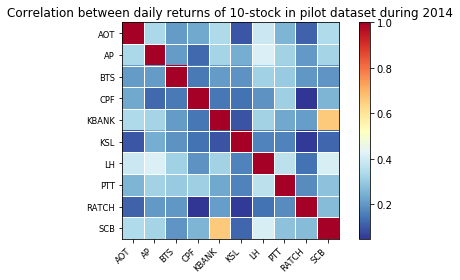

In [8]:
df2 = df.pivot_table(values='DailyReturn', index='Date', columns=['Ticker'])


corr_matrix = np.corrcoef(df2.T)
smg.plot_corr(corr_matrix, xnames=df2.columns)
plt.rc("figure", figsize=(8,6))
plt.title('Correlation between daily returns of 10-stock in pilot dataset during 2014')
plt.show()

# Utility for 1-year, 3-year, 5-year Analysis


stockdata_fetch(period_start, period_end, symbols) => stacked dataframe

In [10]:


def stockdata_fetch(period_start, period_end, symbols=symbols):
    data = {}
    for s in symbols:

        # Read series
        df = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)
        # Add column ticker
        df.loc[:,('Date')] = df.index
        df['Ticker'] = s

        # Add sector column
        for k, sect in sectors.items():
            if s in sect:
                df['Sector'] = k

        # Add industry column
        for k, indus in industries.items():
            if s in indus:
                df['Industry'] = k

        # Add return column: Return from yesterday's closing.
        df["DailyReturn"] = np.log(df["Close"].shift(1)/df["Close"])


        # TODO
        #  Add feature TI from shared library.
        
        # FF-24 Daily Price Variation
        df["DailyPriceVariation"] = (df["High"] - df["Low"]) / df["Close"]

        # FF-25 ~ use VWAP?
        df['PriceStDev-5d'] = df['Close'].rolling(5).std() # Short cut available from pandas
        
        # Add to dictionary
        df = df[period_start:period_end]
        df.dropna(inplace=True) # FIXME: Check drop na location. Or shoud we raise error?
        data[s] = df

    rows = []
    for k, d in data.items():
        rows.append(d)
    df = pd.concat(rows, ignore_index=True)
    return df


# 2015
period_start='2015-01-01'
period_end='2015-12-31'
data1 = stockdata_fetch(period_start, period_end)

data1.pivot_table(values='Close', index='Date', columns=['Industry', 'Sector', 'Ticker']).tail()

Industry      Banking        Energy & Utilities             Food & Beverage  \
Sector     Financials                 Resources        Agro & Food Industry   
Ticker          KBANK    SCB                PTT  RATCH                  CPF   
Date                                                                          
2015-12-24      151.5  120.0          25.000000  48.00            17.600000   
2015-12-25      150.5  120.0          24.799999  47.75            17.500000   
2015-12-28      152.5  120.0          24.700001  47.50            17.500000   
2015-12-29      151.0  120.0          23.700001  47.00            18.100000   
2015-12-30      150.5  119.5          24.400000  47.50            18.299999   

Industry               Property Development       Transportation & Logistics  \
Sector              Property & Construction                         Services   
Ticker          KSL                      AP    LH                        AOT   
Date                                                                           
2015-12-24  3.80000                    5.40  8.95                  34.799999   
2015-12-25  3.76364                    5.45  9.00                  34.700001   
2015-12-28  3.72727                    5.40  9.00                  34.400002   
2015-12-29  3.67273                    5.35  9.20                  35.000000   
2015-12-30  3.72727                    5.35  9.45                  34.599998   

Industry          
Sector            
Ticker       BTS  
Date              
2015-12-24  8.85  
2015-12-25  8.85  
2015-12-28  9.05  
2015-12-29  8.95  
2015-12-30  9.10

In [11]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
High,2440.0,5.241262e+01,6.535599e+01,3.200000,9.050000e+00,2.527500e+01,5.700000e+01,2.360000e+02
Low,2440.0,5.141027e+01,6.416990e+01,3.127270,8.800000e+00,2.480000e+01,5.625000e+01,2.320000e+02
Open,2440.0,5.194203e+01,6.481028e+01,3.163640,8.950000e+00,2.500000e+01,5.675000e+01,2.340000e+02
Close,2440.0,5.188232e+01,6.472330e+01,3.163640,8.950000e+00,2.500000e+01,5.650000e+01,2.350000e+02
Volume,2440.0,1.892698e+07,2.583200e+07,0.000000,3.838850e+06,1.065695e+07,2.551118e+07,4.407690e+08
Adj Close,2440.0,4.108336e+01,5.541345e+01,2.906150,6.113039e+00,1.403097e+01,4.587709e+01,2.044753e+02
DailyReturn,2440.0,8.261893e-04,1.699568e-02,-0.066323,-8.185585e-03,0.000000e+00,9.852240e-03,1.792004e-01
DailyPriceVariation,2440.0,2.106980e-02,1.041344e-02,0.000000,1.407762e-02,1.889767e-02,2.564097e-02,1.090925e-01
PriceStDev-5d,2440.0,7.071494e-01,1.091187e+00,0.000000,1.024695e-01,2.863561e-01,7.202430e-01,9.155599e+00


In [12]:
# 2015-2017
period_start='2015-01-01'
period_end='2017-12-31'
data2 = stockdata_fetch(period_start, period_end)

data2.pivot_table(values='Close', index='Date', columns=['Industry', 'Sector', 'Ticker']).tail()

Industry      Banking        Energy & Utilities             Food & Beverage  \
Sector     Financials                 Resources        Agro & Food Industry   
Ticker          KBANK    SCB                PTT  RATCH                  CPF   
Date                                                                          
2017-12-25      234.0  152.0          44.799999  55.00            24.700001   
2017-12-26      235.0  149.5          44.000000  55.00            24.500000   
2017-12-27      235.0  149.0          44.000000  54.75            24.400000   
2017-12-28      233.0  148.0          43.799999  54.25            24.100000   
2017-12-29      232.0  150.0          44.000000  54.25            24.000000   

Industry            Property Development       Transportation & Logistics  \
Sector           Property & Construction                         Services   
Ticker       KSL                      AP    LH                        AOT   
Date                                                                        
2017-12-25  4.78                    9.10  10.4                      66.50   
2017-12-26  4.84                    9.10  10.6                      68.50   
2017-12-27  4.84                    9.25  10.7                      67.50   
2017-12-28  4.80                    9.10  10.4                      66.75   
2017-12-29  4.66                    9.15  10.5                      68.00   

Industry          
Sector            
Ticker       BTS  
Date              
2017-12-25  8.40  
2017-12-26  8.40  
2017-12-27  8.35  
2017-12-28  8.25  
2017-12-29  8.30

In [13]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
High,7300.0,5.255529e+01,6.260213e+01,3.200000,8.650000e+00,2.850000e+01,5.425000e+01,2.370000e+02
Low,7300.0,5.161920e+01,6.153638e+01,3.120000,8.500000e+00,2.775000e+01,5.350000e+01,2.340000e+02
Open,7300.0,5.210692e+01,6.209460e+01,3.163640,8.600000e+00,2.825000e+01,5.375000e+01,2.350000e+02
Close,7300.0,5.208525e+01,6.206714e+01,3.163640,8.600000e+00,2.820000e+01,5.400000e+01,2.350000e+02
Volume,7300.0,2.010396e+07,2.478086e+07,0.000000,4.617125e+06,1.198645e+07,2.717488e+07,4.407690e+08
Adj Close,7300.0,4.370897e+01,5.443235e+01,2.906150,6.853260e+00,1.931277e+01,4.584712e+01,2.152548e+02
DailyReturn,7300.0,-1.488790e-04,1.628803e-02,-0.112656,-8.438820e-03,0.000000e+00,8.510722e-03,1.792004e-01
DailyPriceVariation,7300.0,2.025650e-02,1.244397e-02,0.000000,1.249999e-02,1.754381e-02,2.500000e-02,2.191011e-01
PriceStDev-5d,7300.0,6.363563e-01,9.714890e-01,0.000000,9.617687e-02,2.588430e-01,6.808083e-01,9.155599e+00


In [14]:
# 2015-2019
period_start='2015-01-01'
period_end='2019-12-31'
data3 = stockdata_fetch(period_start, period_end)

data3.pivot_table(values='Close', index='Date', columns=['Industry', 'Sector', 'Ticker']).tail()

Industry      Banking        Energy & Utilities             Food & Beverage  \
Sector     Financials                 Resources        Agro & Food Industry   
Ticker          KBANK    SCB                PTT  RATCH                  CPF   
Date                                                                          
2019-12-24      148.0  118.5              44.25  69.00                27.75   
2019-12-25      151.0  119.5              44.25  69.50                27.75   
2019-12-26      150.0  119.0              44.50  69.00                27.75   
2019-12-27      150.0  119.5              44.25  69.50                27.50   
2019-12-30      151.0  122.0              44.00  68.75                27.50   

Industry            Property Development       Transportation & Logistics  \
Sector           Property & Construction                         Services   
Ticker       KSL                      AP    LH                        AOT   
Date                                                                        
2019-12-24  2.18                    6.90  9.70                      73.25   
2019-12-25  2.16                    7.00  9.75                      74.00   
2019-12-26  2.18                    7.35  9.70                      74.75   
2019-12-27  2.18                    7.35  9.75                      74.25   
2019-12-30  2.24                    7.45  9.80                      74.25   

Industry          
Sector            
Ticker       BTS  
Date              
2019-12-24  13.1  
2019-12-25  13.2  
2019-12-26  13.2  
2019-12-27  13.2  
2019-12-30  13.2

In [15]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
High,12190.0,5.413081e+01,6.167415e+01,1.910000,9.050000e+00,2.875000e+01,6.400000e+01,2.450000e+02
Low,12190.0,5.316514e+01,6.062873e+01,1.880000,8.850000e+00,2.800000e+01,6.275000e+01,2.410000e+02
Open,12190.0,5.366808e+01,6.118490e+01,1.910000,8.950000e+00,2.850000e+01,6.325000e+01,2.430000e+02
Close,12190.0,5.364051e+01,6.113739e+01,1.910000,8.950000e+00,2.850000e+01,6.350000e+01,2.420000e+02
Volume,12190.0,2.138099e+07,2.715742e+07,0.000000,4.783125e+06,1.254000e+07,2.864185e+07,4.407690e+08
Adj Close,12190.0,4.715596e+01,5.496948e+01,1.862723,7.403442e+00,2.321586e+01,6.158589e+01,2.216666e+02
DailyReturn,12190.0,-3.023541e-05,1.550206e-02,-0.112656,-8.138407e-03,0.000000e+00,8.368248e-03,1.792004e-01
DailyPriceVariation,12190.0,2.012037e-02,1.166132e-02,0.000000,1.260835e-02,1.769912e-02,2.484476e-02,2.191011e-01
PriceStDev-5d,12190.0,6.396718e-01,9.469107e-01,0.000000,9.617688e-02,2.727153e-01,7.416198e-01,1.077961e+01


In [18]:
# 2016
period_start='2016-01-01'
period_end='2016-12-31'
data4 = stockdata_fetch(period_start, period_end)

In [19]:
# 2017
period_start='2017-01-01'
period_end='2017-12-31'
data5 = stockdata_fetch(period_start, period_end)

In [20]:
# 2018
period_start='2018-01-01'
period_end='2018-12-31'
data6 = stockdata_fetch(period_start, period_end)

# Correlation daily return 1-year , 3-year, 5-year

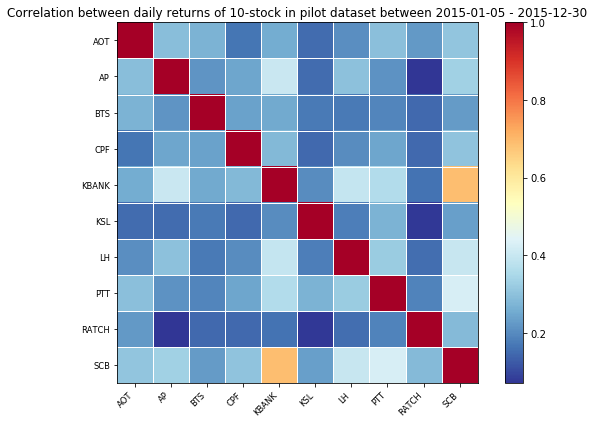

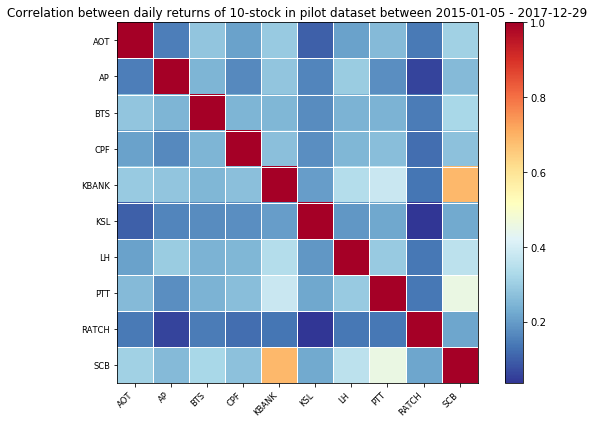

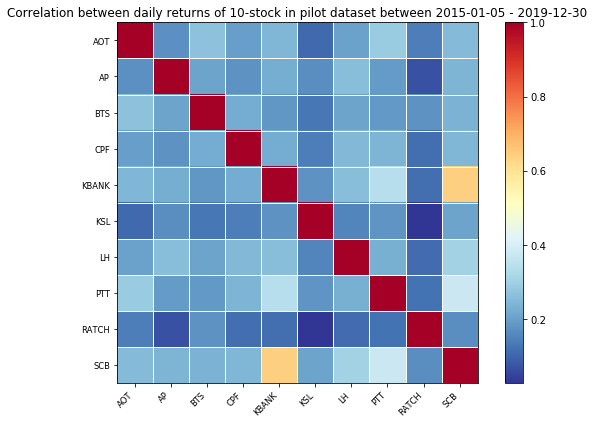

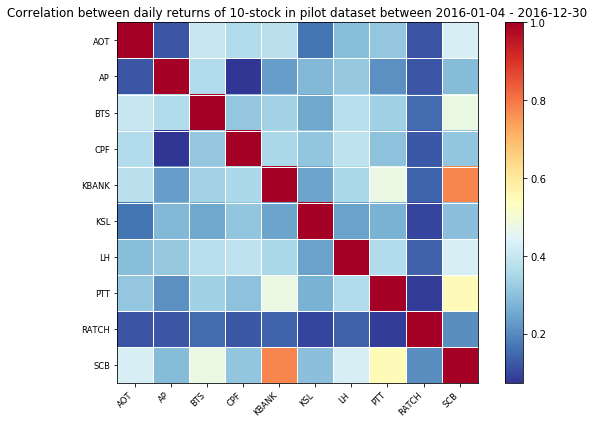

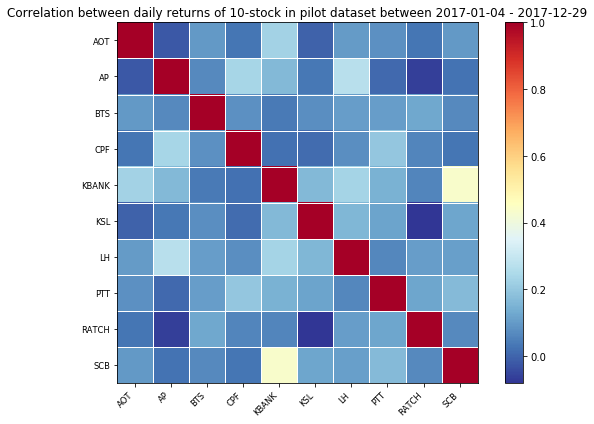

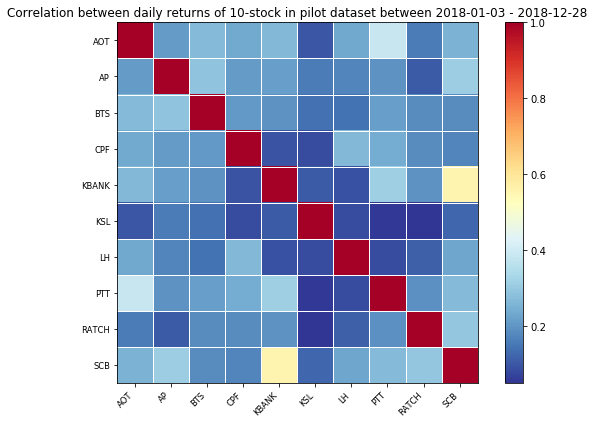

In [40]:
ds = [data1, data2, data3, data4, data5, data6]

for ds1 in ds:
    dt_from = ds1.head(1).Date.values[0]
    dt_to = ds1.tail(1).Date.values[0]
    df2 = ds1.pivot_table(values='DailyReturn', index='Date', columns=['Ticker'])
    corr_matrix = np.corrcoef(df2.T)
    smg.plot_corr(corr_matrix, xnames=df2.columns)
    plt.rc("figure", figsize=(8,6))
    plt.title('Correlation between daily returns of 10-stock in pilot dataset between %s - %s' % (dt_from, dt_to))
    plt.savefig('correlation_DailyReturn_%s_%s.png' % (dt_from,dt_to))
    plt.show()

In [25]:

# Correlation close price 1-year , 3-year, 5-year

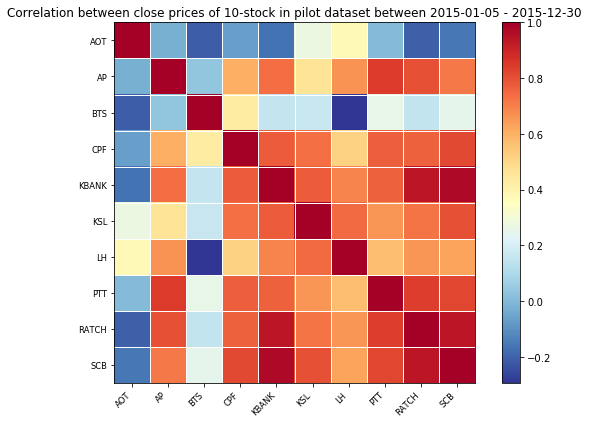

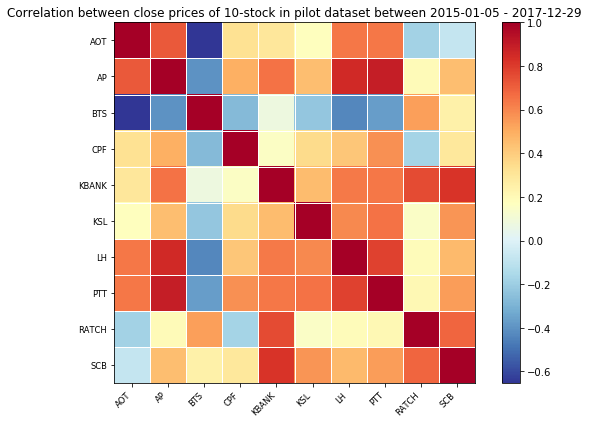

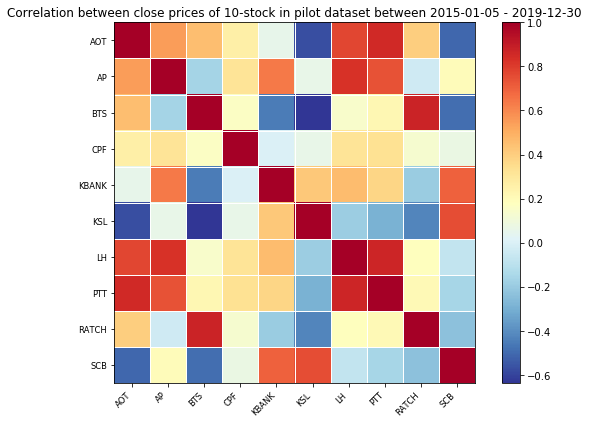

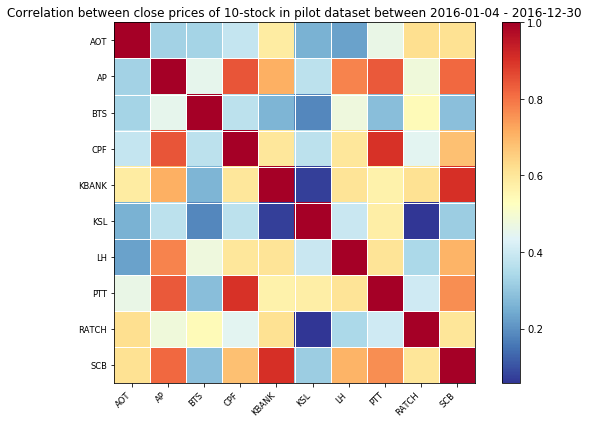

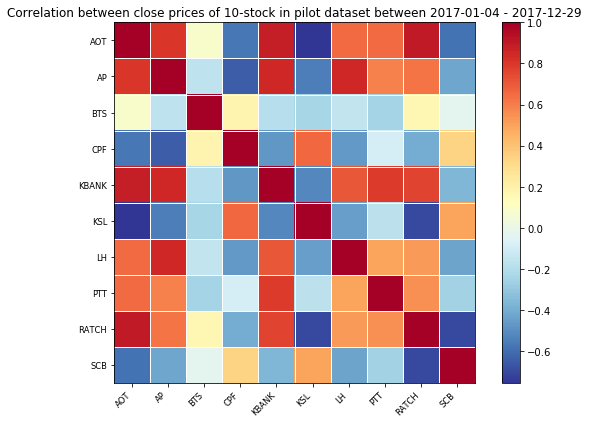

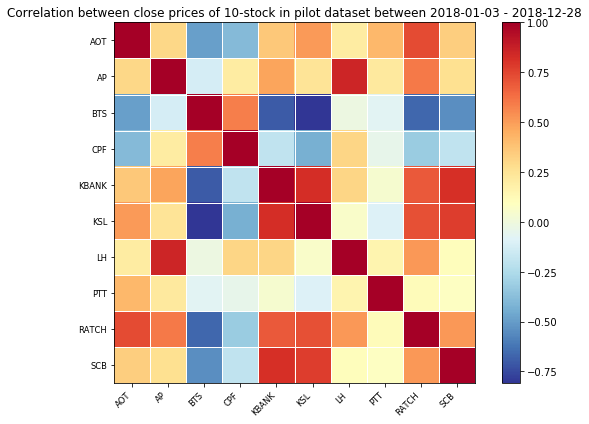

In [39]:
for ds1 in ds:
    dt_from = ds1.head(1).Date.values[0]
    dt_to = ds1.tail(1).Date.values[0]
    df2 = ds1.pivot_table(values='Close', index='Date', columns=['Ticker'])
    corr_matrix = np.corrcoef(df2.T)
    smg.plot_corr(corr_matrix, xnames=df2.columns)
    plt.rc("figure", figsize=(8,6))
    plt.title('Correlation between close prices of 10-stock in pilot dataset between %s - %s' % (dt_from, dt_to))
    plt.savefig('correlation_ClosePrice_%s_%s.png' % (dt_from,dt_to))
    plt.show()

In [28]:
# Correlation volatility (PriceStDev-5d) 1-year , 3-year, 5-year

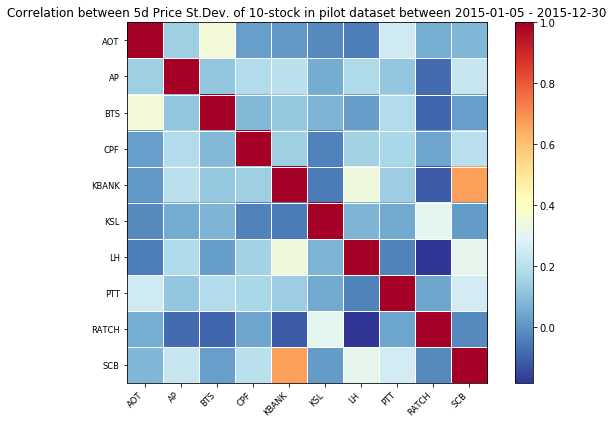

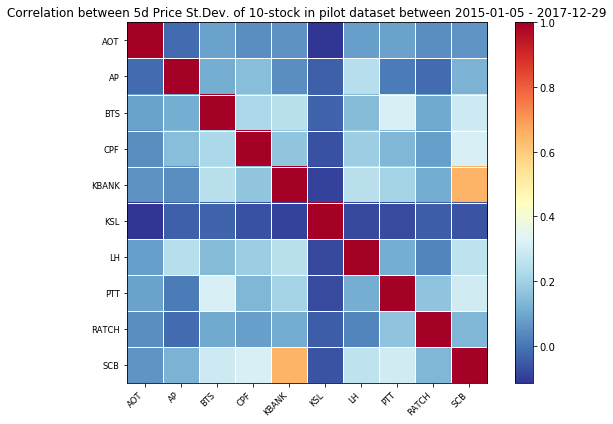

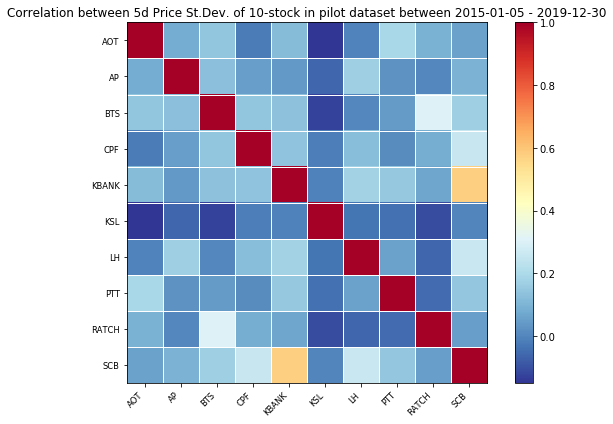

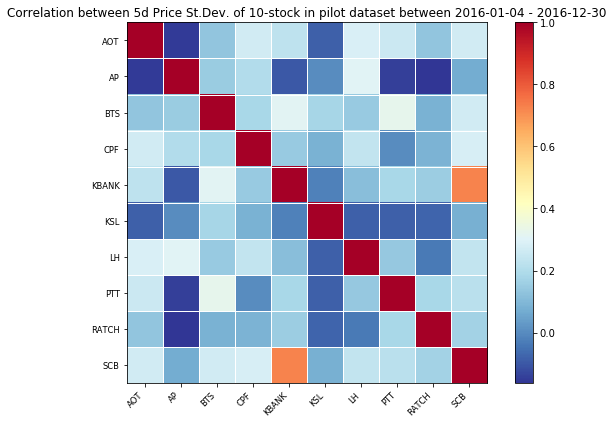

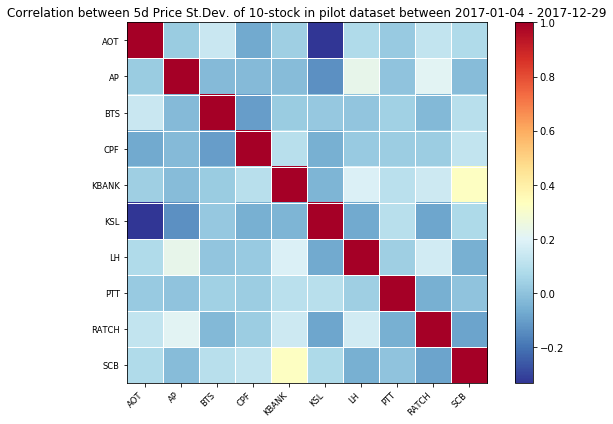

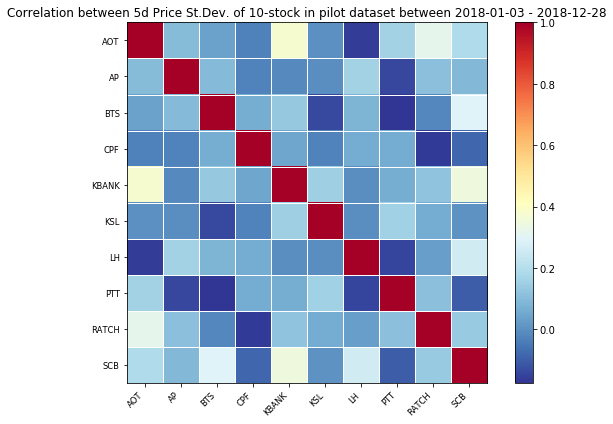

In [38]:
for ds1 in ds:
    dt_from = ds1.head(1).Date.values[0]
    dt_to = ds1.tail(1).Date.values[0]
    df2 = ds1.pivot_table(values='PriceStDev-5d', index='Date', columns=['Ticker'])
    corr_matrix = np.corrcoef(df2.T)
    smg.plot_corr(corr_matrix, xnames=df2.columns)
    plt.rc("figure", figsize=(8,6))
    plt.title('Correlation between 5d Price St.Dev. of 10-stock in pilot dataset between %s - %s' % (dt_from, dt_to))
    plt.savefig('correlation_Vola5d_%s_%s.png' % (dt_from,dt_to))
    plt.show()


In [32]:
# Correlation daily price variation (DailyPriceVariation) 1-year , 3-year, 5-year 

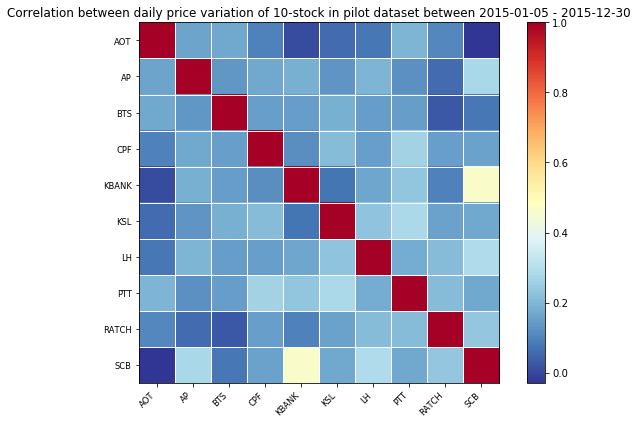

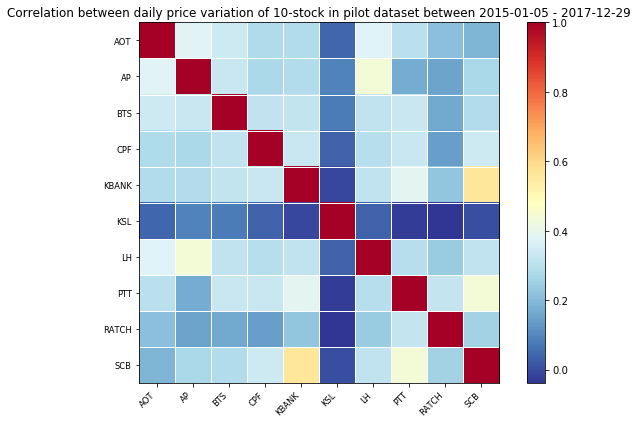

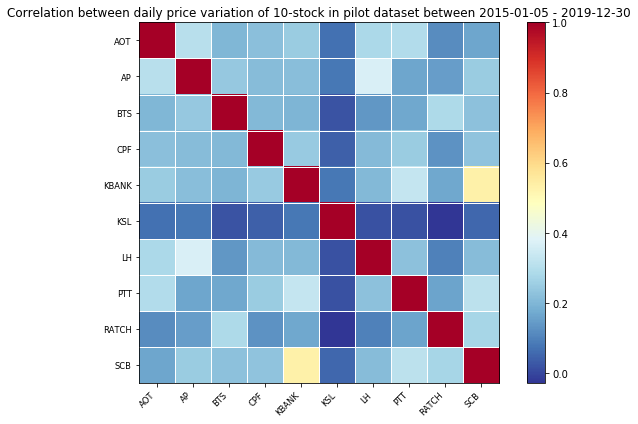

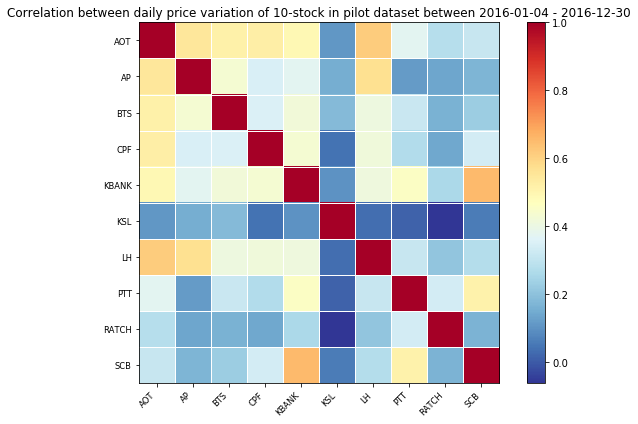

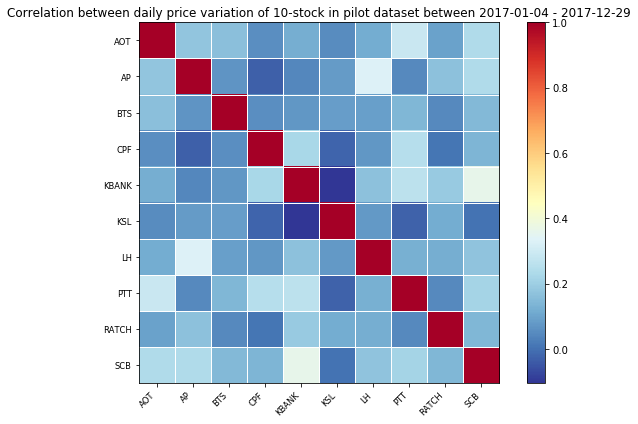

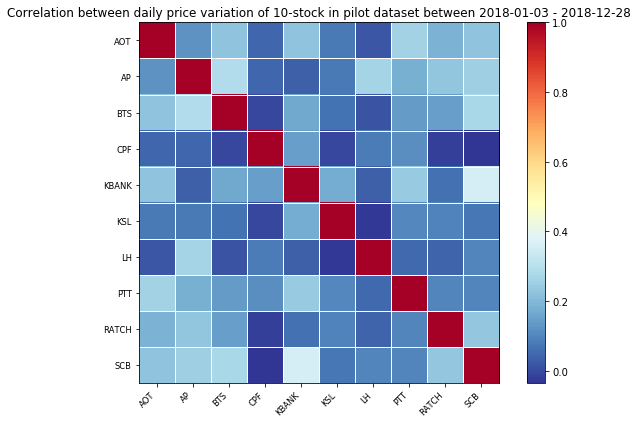

In [41]:
for ds1 in ds:
    dt_from = ds1.head(1).Date.values[0]
    dt_to = ds1.tail(1).Date.values[0]
    df2 = ds1.pivot_table(values='DailyPriceVariation', index='Date', columns=['Ticker'])
    corr_matrix = np.corrcoef(df2.T)
    smg.plot_corr(corr_matrix, xnames=df2.columns)
    plt.rc("figure", figsize=(8,6))
    plt.title('Correlation between daily price variation of 10-stock in pilot dataset between %s - %s' % (dt_from, dt_to))
    plt.savefig('correlation_DailyVary_%s_%s.png' % (dt_from,dt_to))
    plt.show()